<a href="https://colab.research.google.com/github/wanwanliang/ML_Projects/blob/main/Neural_network_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= '0.20'
import os
import numpy as np
import tensorflow as tf
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:,(2,3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter = 1000, tol=1e-3, random_state=42)
per_clf.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

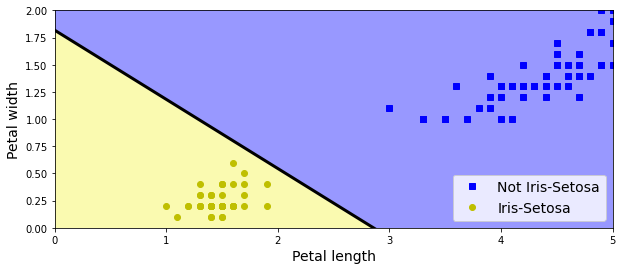

In [11]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10,4))
plt.plot(X[y==0,0], X[y==0,1], 'bs', label='Not Iris-Setosa')
plt.plot(X[y==1,0], X[y==1,1], 'yo', label='Iris-Setosa')

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff','#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.axis(axes)
plt.show()

## Activation functions

In [13]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def relu(z):
  return np.maximum(0,z)

def derivative(f, z, eps=0.000001):
  return (f(z+eps)-f(z-eps))/(2+eps)